In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./UK_monthly_gdp.csv')

# Inspect the data
data.head()


,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


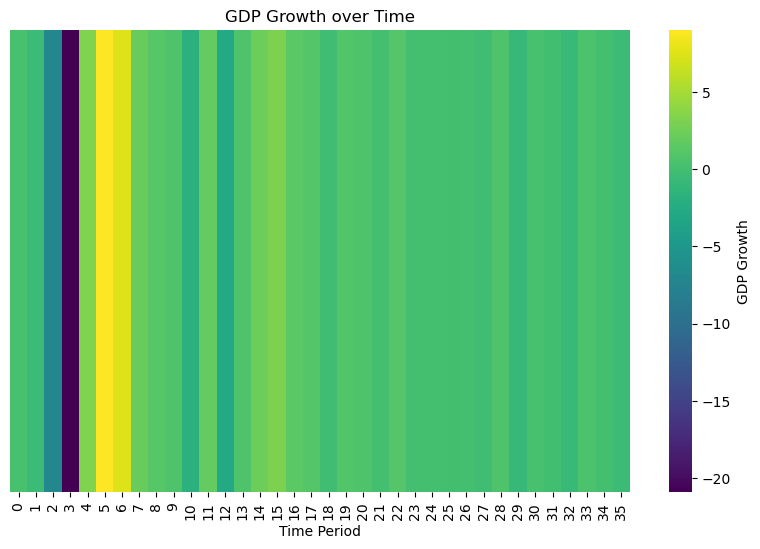

In [3]:
# Create a figure with a specific size
fig = plt.figure(figsize=(10, 6))

# Create a heatmap for the 'GDP Growth' data
sns.heatmap(data[['GDP Growth']].T, cmap='viridis', 
            xticklabels=data.index, yticklabels=False, 
            cbar_kws={'label': 'GDP Growth'})

# Set the title and labels
plt.title('GDP Growth over Time')
plt.xlabel('Time Period')

fig.savefig('GDP_Growth.png')


# Display the heatmap
plt.show()

In [4]:
# Convert the 'Time Period' column to datetime format
from tqdm import tqdm

tqdm.pandas()

data['Time Period']= pd.to_datetime(data['Time Period'])

#data['Time Period'] = data['Time Period'].progress_apply(lambda x: pd.to_datetime(x, format='/%m/%Y'))

# Set the 'Time Period' column as the index

data.set_index('Time Period', inplace=True)

# Create a new DataFrame 'quarterly_data' by resampling to quarterly averages
quarterly_data = data.resample('Q').mean()

quarterly_data.head()


/tmp/ipykernel_668/3204506368.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time Period']= pd.to_datetime(data['Time Period'])


,GDP Growth
Time Period,
2020-03-31,-2.400000
2020-06-30,-2.900000
2020-09-30,3.500000
2020-12-31,0.200000
2021-03-31,0.033333


In [5]:
quarterly_data['Recession'] = None
quarterly_data['Recession'] = quarterly_data['GDP Growth'] < 0

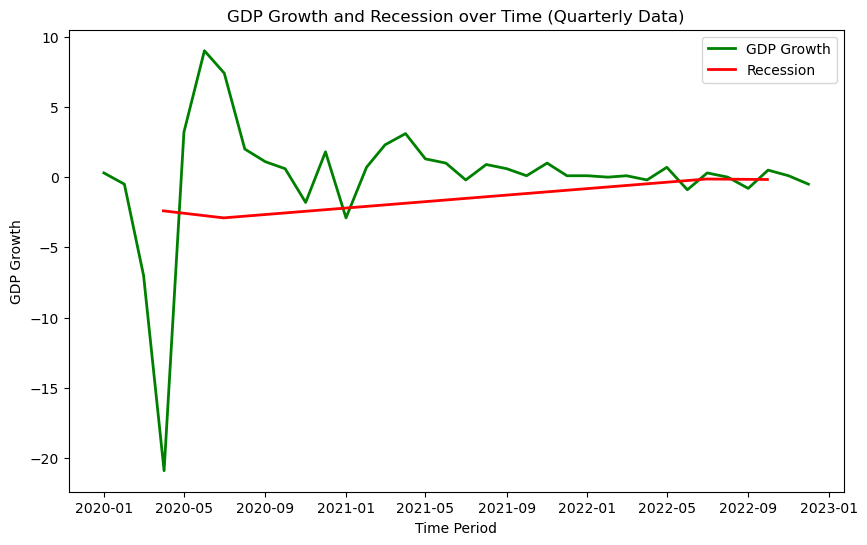

In [6]:
# Create a figure with a specific size
fig1 = plt.figure(figsize=(10,6))

# Prepare data for plotting
index = data.index.to_numpy()
gdp_growth = data['GDP Growth'].to_numpy()

# Plot GDP Growth
plt.plot(index, gdp_growth, color='green', 
         label='GDP Growth', linewidth=2)

# Isolate recession data
recession_data = quarterly_data[quarterly_data['Recession']]
recession_data_index = recession_data.index.to_numpy()
recession_data_gdp_growth = recession_data['GDP Growth'].to_numpy()

# Plot Recession periods
plt.plot(recession_data_index, recession_data_gdp_growth, color='red', 
         label='Recession', linewidth=2)

# Set the title and labels
plt.title('GDP Growth and Recession over Time (Quarterly Data)')
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')
plt.legend()

fig1.savefig('Growth_VS_Recession.png')

# Display the plot
plt.show()

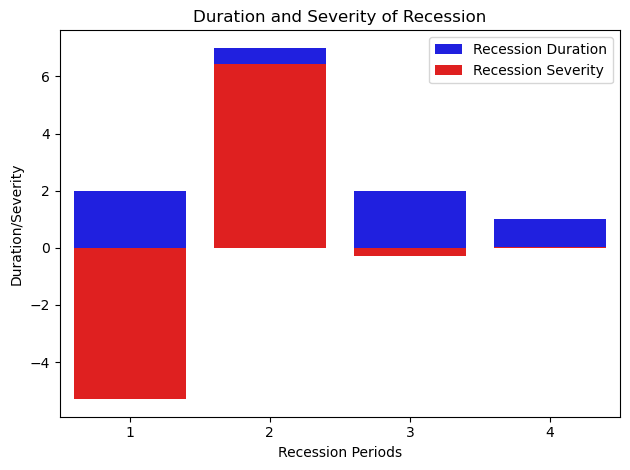

In [15]:
# Calculate 'Recession Start' by detecting changes in the 'Recession' column
quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()

# Group the data by 'Recession Start' to identify recession periods
recession_periods = quarterly_data.groupby('Recession Start')

# Calculate the duration and severity of recession periods
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

# Create a figure with a specific size

fig2 = plt.figure()

# Prepare data for plotting
recession_duration = recession_duration.reset_index(name='Duration')
recession_severity = recession_severity.reset_index(name='Severity')

# Merge the duration and severity data
recession_data = pd.merge(recession_duration, recession_severity, on='Recession Start')

# Plot Recession Duration
sns.barplot(x='Recession Start', y='Duration', data=recession_data, color='blue', label='Recession Duration')

# Plot Recession Severity
sns.barplot(x='Recession Start', y='Severity', data=recession_data, color='red', label='Recession Severity')

# Set the title and labels
plt.title('Duration and Severity of Recession')
plt.xlabel('Recession Periods')
plt.ylabel('Duration/Severity')
plt.legend()

plt.tight_layout()

fig2.savefig('Recession_Trends.png')

# Display the bar plot
plt.show()
